In [1]:
import tensorflow

In [2]:
from mtcnn import MTCNN

Using TensorFlow backend.


In [3]:
import cv2

In [4]:
import os

In [5]:
import uuid

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
os.listdir()

['setup-env.sh',
 '.DS_Store',
 'MTCNN.ipynb',
 'delegates.jpg',
 '.ipynb_checkpoints']

In [8]:
def detect_faces(data=None):
    detector = MTCNN()
    fig = plt.figure(figsize=(12, 10), dpi=100)
    ax = fig.add_axes([0, 0, 1, 1])
    ax.imshow(data, cmap='gray')
    faces = detector.detect_faces(data)
    return faces

In [9]:
def decouple_faces(faces=None, img=None, subplots=1):
    row = 0
    col = 0
    fig, ax = plt.subplots(5, subplots, figsize = (12,10))
    for face in faces:
        x1, y1, width, height = face['box']
        x2, y2 = x1 + width, y1 + height
        
        # subplots
        if row < 5:
            if col <= subplots:
                ax[row, col].imshow(img[y1:y2, x1:x2])
                col = col+1
            if col == subplots:
                row=row+1
                col = 0
    [axi.set_axis_off() for axi in ax.ravel()]

In [10]:
def draw_faces(faces=None, img=None):
    for face in faces:
        bounding_box = face['box']
        keypoints = face['keypoints']
        cv2.rectangle(img,
              (bounding_box[0], bounding_box[1]),
              (bounding_box[0]+bounding_box[2], bounding_box[1] + bounding_box[3]),
              (0,155,255),
              2)
        cv2.circle(img,(keypoints['left_eye']), 2, (0,155,255), 2)
        cv2.circle(img,(keypoints['right_eye']), 2, (0,155,255), 2)
        cv2.circle(img,(keypoints['nose']), 2, (0,155,255), 2)
        cv2.circle(img,(keypoints['mouth_left']), 2, (0,155,255), 2)
        cv2.circle(img,(keypoints['mouth_right']), 2, (0,155,255), 2)
    cv2.imwrite(str(uuid.uuid4())+".jpg", cv2.cvtColor(img, cv2.COLOR_RGB2BGR))
    fig = plt.figure(figsize=(12, 10), dpi=100)
    ax = fig.add_axes([0, 0, 1, 1])
    ax.imshow(img, cmap='gray')

In [13]:
filename = 'delegates.jpg'
data = cv2.cvtColor(cv2.imread(filename), cv2.COLOR_BGR2RGB)
faces = detect_faces(data=data)
print(f'Number of faces recognized {len(faces)}')

Number of faces recognized 33


Subplot 7


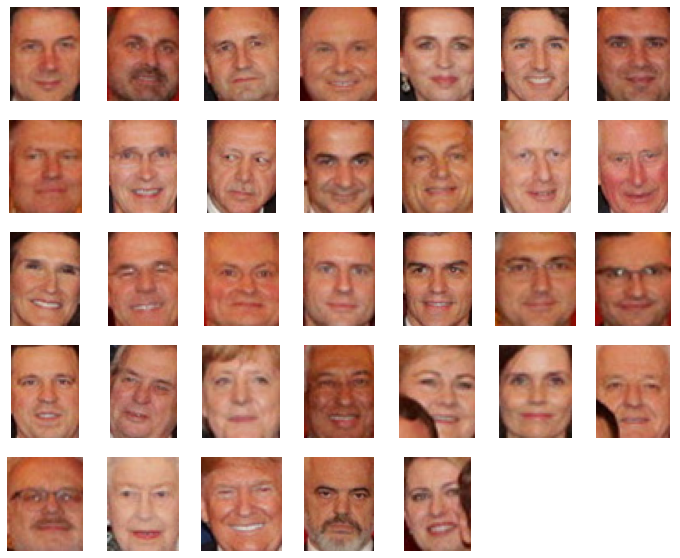

In [14]:
sample_space = len(faces)%5
if sample_space > 0:
    subplots = len(faces)//5+1
else:
    subplots = len(faces)//5
print(f'Subplot {subplots}')
decouple_faces(faces, data, subplots)

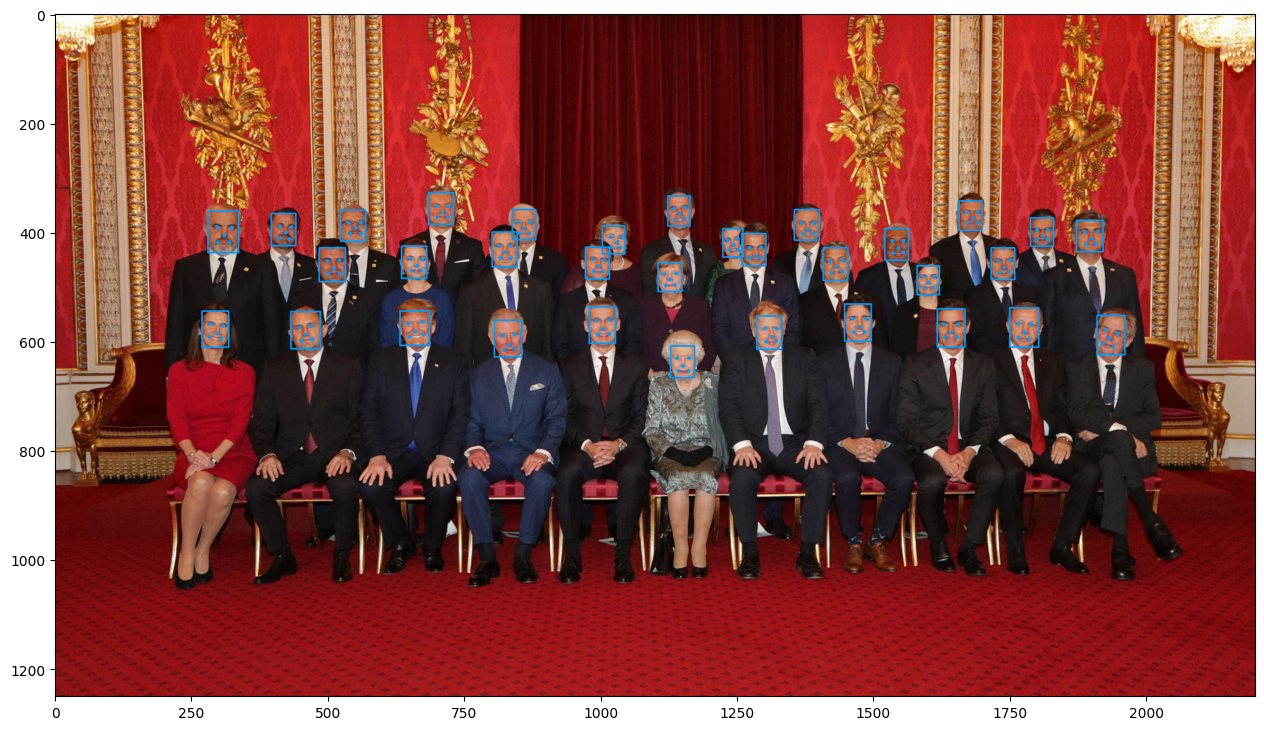

In [16]:
draw_faces(faces, data)